In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
players = pd.read_csv(r'/kaggle/input/ipl-player-clusters/Batsmen.csv').reset_index()
players = players.drop(["index", "Unnamed: 0"], axis = 1)
players.head(10)

,Player_Id,Runs,Balls_played,Strike_Rate,cluster,Player_Name,Batting_Hand,DOB,Country
0,236,924.0,760,121.58,0,Mandeep Singh,Right_Hand,18-Dec-91,India
1,71,1262.0,1032,122.29,0,DJ Bravo,Right_Hand,7-Oct-83,West Indies
2,383,942.0,762,123.62,0,LMP Simmons,Right_Hand,25-Jan-85,West Indies
3,104,1400.0,1153,121.42,0,BJ Hodge,Right_Hand,29-Dec-74,Australia
4,355,726.0,566,128.27,0,Q de Kock,Left_Hand,17-Dec-92,South Africa
5,354,725.0,592,122.47,0,KL Rahul,Right_Hand,18-Apr-92,India
6,345,728.0,580,125.52,0,M Vohra,Right_Hand,18-Jul-93,India
7,157,604.0,466,129.61,0,JD Ryder,Left_Hand,6-Aug-84,New Zealand
8,158,1001.0,758,132.06,0,KP Pietersen,Right_Hand,27-Jun-80,South Africa
9,163,692.0,564,122.70,0,MC Henriques,Right_Hand,1-Feb-87,Australia


In [3]:
#country Wise runs
country_Runs=players.groupby('Country')['Runs','Balls_played'].sum().reset_index().sort_values(by='Runs',ascending=False)

/tmp/ipykernel_20/1473777867.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  country_Runs=players.groupby('Country')['Runs','Balls_played'].sum().reset_index().sort_values(by='Runs',ascending=False)


In [4]:
#calculating the strike
dec_places = 2
country_Runs['strike_rate']=((country_Runs['Runs']/country_Runs['Balls_played'])*100).round(dec_places)

In [5]:
country_Runs

,Country,Runs,Balls_played,strike_rate
3,India,49869.0,38616,129.14
0,Australia,22108.0,16971,130.27
7,South Africa,12148.0,9054,134.17
9,West Indies,10529.0,7639,137.83
5,New Zealand,4541.0,3622,125.37
8,Sri Lanka,1943.0,1511,128.59
2,England,1436.0,1080,132.96
6,Pakistan,753.0,536,140.49
1,Bangladesh,499.0,400,124.75
4,Netherlands,326.0,238,136.97


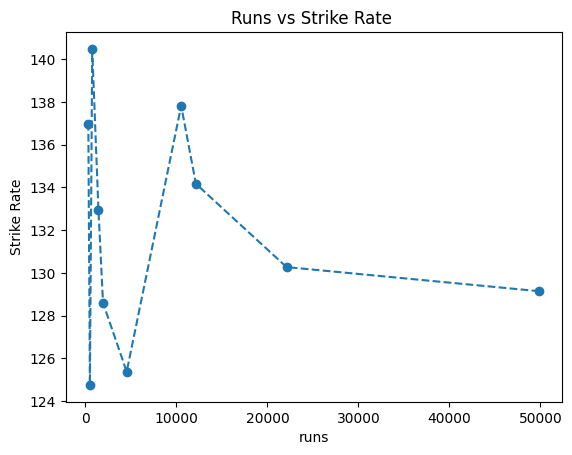

In [6]:
plt.plot(country_Runs['Runs'],country_Runs['strike_rate'], linestyle='--', marker='o')
plt.xlabel("runs")
plt.ylabel("Strike Rate")
plt.title("Runs vs Strike Rate ")
plt.show()